In this notebook we will show all the tricks we can use to transform dataframes

In [2]:
import os
import pandas as pd
import numpy as np

os.chdir("../../coding_data/cookbook_data/")
os.getcwd()

"C:\\Users\\k2035549\\OneDrive - King's College London\\Desktop\\Coding\\coding_data\\cookbook_data"

Read data

In [12]:
flights = pd.read_csv('data/flights.csv')

meetup = pd.read_csv('data/meetup_groups.csv',
    parse_dates=['join_date'], # change column to timestamp
    index_col='join_date')

emp = pd.read_csv('data/employee.csv',
    parse_dates=['HIRE_DATE', 'JOB_DATE'])

dia = pd.read_csv('data/diamonds.csv')

movie = pd.read_csv('data/movie.csv')

fueleco = pd.read_csv('data/vehicles.csv.zip')

weight_loss = pd.read_csv('data/weight_loss.csv')

college = pd.read_csv('data/college.csv')

# .apply

Make single column in dataframe to series

In [23]:
(fueleco
 .rangeA
 .str.extract(r'([^0-9.])')
 .dropna()
#  .apply(lambda row: ''.join(row), axis=1)
#  .value_counts()
)

,0
7125,/
7126,/
7127,/
7128,/
7129,/
...,...
32291,/
32339,/
32340,/
32342,/


In [29]:
(fueleco
 .rangeA
 .str.extract(r'([^0-9.])')
 .dropna()
 .apply(lambda row: ''.join(row), axis=1)
#  .value_counts()
)

7125     /
7126     /
7127     /
7128     /
7129     /
        ..
32291    /
32339    /
32340    /
32342    /
32343    /
Length: 351, dtype: object

# .assign

In [3]:
# define function used to find years of experience
def yrs_exp(df_):
    days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE # dates minus each other returns a time delta object units in days
    return days_hired.dt.days / 365.25

# applying function by stating it in .assign function
emp = (
    emp
    .assign(YEARS_EXPERIENCE=yrs_exp)
)

emp.head(3)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,10.472279
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,16.369610
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1.826146


# Creating columns

In [3]:
import pandas as pd
import numpy as np
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')

### .assign()

Example 1: Adding column 

In [4]:
# load data
import pandas as pd
import numpy as np
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')


(alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .SNWD
    .to_frame()
    .assign(
        next=lambda df_:df_.SNWD.shift(-1), # first new column to create
        snwd_diff=lambda df_:df_.next-df_.SNWD # second new column to create
    )
).head(3)

,SNWD,next,snwd_diff
DATE,,,
1980-01-01,29.0,34.0,5.0
1980-01-02,34.0,30.0,-4.0
1980-01-03,30.0,30.0,0.0


Example two: assigning column and using ge function. Assign columns DELAYED and ON_TIME

In [5]:
# load data
import pandas as pd
flights = pd.read_csv('data/flights.csv')
flights.head(3)

# add 
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']

(flights
    .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
            ON_TIME=lambda df_:1 - df_[cols].any(axis=1))
    .select_dtypes([int,'int64'])
    .sum()
)

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64

Example 3: assign to change data type

In [13]:
(fueleco
  [['city08', 'comb08']]
  .assign(city08=fueleco.city08.astype(np.int16),
          comb08=fueleco.comb08.astype(np.int16))
  .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


# Filtering

### Filter with certain strings in a column

Here we are filtering for the 2018 and 2019 years with the date column

In [42]:
import pandas as pd
import numpy as np
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')

alta[alta['DATE'].str.contains("2018|2019")].head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
13546,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-01,NaN,NaN,NaN,NaN,...,23.0,35.0,16.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
13547,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-02,NaN,NaN,NaN,NaN,...,23.0,40.0,17.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
13548,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-03,NaN,NaN,NaN,NaN,...,22.0,45.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
alta[alta['DATE'].str.contains("2018|2019")].head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
13546,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-01,NaN,NaN,NaN,NaN,...,23.0,35.0,16.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
13547,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-02,NaN,NaN,NaN,NaN,...,23.0,40.0,17.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
13548,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2018-01-03,NaN,NaN,NaN,NaN,...,22.0,45.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


### .pipe()

can be used to filter dataframe when applying multiple functions at once.

Below we can see an example fo filtering when snow difference is greater than 50

In [63]:
# load data
import pandas as pd
import numpy as np
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')

(alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .SNWD
    .to_frame()
    .assign(next=lambda df_:df_.SNWD.shift(-1),
            snwd_diff=lambda df_:df_.next-df_.SNWD)
    .pipe(lambda df_: df_[df_.snwd_diff.abs() > 50])
).head(3)

,SNWD,next,snwd_diff
DATE,,,
1989-11-27,60.0,0.0,-60.0
2007-02-28,87.0,9.0,-78.0
2008-05-22,62.0,0.0,-62.0


can be used to apply a function to a single column (DIST column below)

In [ ]:
(flights
    .reset_index(drop=True)
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .pipe(lambda df_:pd.cut(df_.DIST, # pd.cut, places values into a specific binned group
          bins=range(0, 2001, 250)))
    .value_counts()
    .sort_index()
)

### Filter by datatypes

In [14]:
flights = pd.read_csv('data/flights.csv')

# select int columns
flights.select_dtypes([int,'int64'])

,MONTH,DAY,WEEKDAY,SCHED_DEP,DIST,SCHED_ARR,DIVERTED,CANCELLED
0,1,1,4,1625,590,1905,0,0
1,1,1,4,823,1452,1333,0,0
2,1,1,4,1305,641,1453,0,0
3,1,1,4,1555,1192,1935,0,0
4,1,1,4,1720,1363,2225,0,0
...,...,...,...,...,...,...,...,...
58487,12,31,4,515,1464,1045,0,0
58488,12,31,4,1910,414,2050,0,0
58489,12,31,4,1846,262,1956,0,0
58490,12,31,4,525,907,855,0,0


In [18]:
# select object columns
flights.select_dtypes(object)#.columns

,AIRLINE,ORG_AIR,DEST_AIR
0,WN,LAX,SLC
1,UA,DEN,IAD
2,MQ,DFW,VPS
3,AA,DFW,DCA
4,WN,LAX,MCI
...,...,...,...
58487,AA,SFO,DFW
58488,F9,LAS,SFO
58489,OO,SFO,SBA
58490,WN,MSP,ATL


### Filter top 6

Use value counts on fueleco to find top car makes and the filter out rest with other

In [20]:
top_n = fueleco.make.value_counts().index[:6]

(fueleco
   .assign(
       make=fueleco.make.where(
           fueleco.make.isin(top_n),
           'Other'
       )
   )
   .make
   .value_counts()
)

Other        23211
Chevrolet     3900
Ford          3208
Dodge         2557
GMC           2442
Toyota        1976
BMW           1807
Name: make, dtype: int64

# Groupby

### .Grouper

In [ ]:
# read data
meetup = pd.read_csv('data/meetup_groups.csv',
    parse_dates=['join_date'], # change column to timestamp
    index_col='join_date')

# let's get the number of people who joined each group each week
(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
)

### Example 1: 10 airports with i) longest average distance traveled for inbound flights ii) have a minimum of 100 total flights

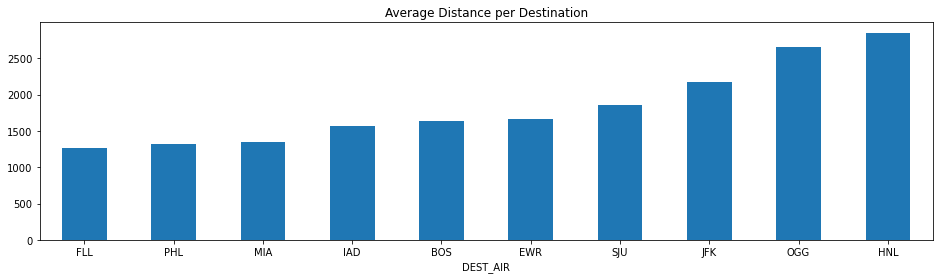

In [18]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
flights = pd.read_csv('data/flights.csv')
flights.head(3)

fig, ax = plt.subplots(figsize=(16,4))
(flights
    .groupby('DEST_AIR') # destination airport
    ['DIST'] 
    .agg(['mean', 'count']) 
    .query('count > 100') 
    .sort_values('mean') 
    .tail(10) 
    .plot.bar(y='mean', rot=0, legend=False, ax=ax,
        title='Average Distance per Destination')
)

### Example 2: z score for groups

Working out z score for a grouped data

In [ ]:
# add bin column to data ie group each data point belongs in
zscore = lambda x: (x - x.mean()) / x.std()

short = (flights
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .reset_index(drop=True)    
    .assign(BIN=lambda df_:pd.cut(df_.DIST,
        bins=range(0, 2001, 250)))
)

# Groupby, works out the mean of that group and std and then applies it to that point
scores = (short
    .groupby('BIN')
    ['AIR_TIME']
    .transform(zscore)
)  

# assign score column
(short.assign(SCORE=scores))

# .itertuples(index=False):

In [11]:
zscore = lambda x: (x - x.mean()) / x.std()
short = (flights
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .reset_index(drop=True)    
    .assign(BIN=lambda df_:pd.cut(df_.DIST,
        bins=range(0, 2001, 250)))
)

scores = (short
    .groupby('BIN')
    ['AIR_TIME']
    .transform(zscore)
)  

mask = (short
    .assign(SCORE=scores)
    .pipe(lambda df_:df_.SCORE.abs() >6)
)

outliers = (flights
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .reset_index(drop=True)
    [mask]
    .assign(PLOT_NUM=lambda df_:range(1, len(df_)+1))
)

In [13]:
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
#     print(ax.text(d + 5, t + 5, str(n)))
    print(f'Time value: {t}. Distance value: {d}. Plot number: {n}')

Time value: 121.0. Distance value: 373. Plot number: 1
Time value: 199.0. Distance value: 907. Plot number: 2
Time value: 176.0. Distance value: 643. Plot number: 3
Time value: 164.0. Distance value: 651. Plot number: 4
Time value: 210.0. Distance value: 802. Plot number: 5


# .loc

### FIlter index for specific range

Here we can see that you can search the index (if string) by using certain values and not all ie year and month only

First we load the data required

In [2]:
import pandas as pd
import numpy as np
alta = pd.read_csv('alta-noaa-1980-2019.csv')
alta.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


filter dataframe index for required field

In [5]:
data = (
    alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .loc['2018-09':'2019-08']
    .SNWD
)
data.head(3)

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
Name: SNWD, dtype: float64

NB: pd.to_datetime can have multiple inputs

In [16]:
date_column_series = alta.DATE
first_date_string = alta.DATE.iloc[0]

pd.to_datetime(date_column_series)
pd.to_datetime(first_date_string)

Timestamp('1980-01-01 00:00:00')

### Replace dataframe column values based on condition

In [10]:
import pandas as pd
import numpy as np
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')
alta.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
alta.loc[alta['SNWD']>25, 'NAME'] = 'Greater'

alta.loc[alta['SNWD']>25, ['NAME','LATITUDE']] = ['Greater',50]
alta.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,Greater,50.0,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,Greater,50.0,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,Greater,50.0,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


# Datatype for columns

### Change datatype of columns

In [62]:
flights = pd.read_csv('data/flights.csv')

flights = flights.astype({"MONTH":'int64'})

# Normalizing data

Example: after cross tabulation, normalize data

In [8]:
(data
 .pipe(lambda df_: pd.crosstab(df_.make, df_.SClass))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
)

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,0.861649,0.087438,0.000000,0.000000,0.050913,0.000000
Ford,0.335100,0.115960,0.324190,0.103491,0.048317,0.072943
Tesla,0.782609,0.217391,0.000000,0.000000,0.000000,0.000000
Toyota,0.391194,0.190283,0.241903,0.047571,0.066802,0.062247


# Time series

### .resample()

In [66]:
# load data
flights = pd.read_csv('data/flights.csv')

# get datetime data (only have month and day from dataset and then scheduled departing)
df_date = (
    flights
    [['MONTH', 'DAY']]
    .assign(
        YEAR=2015, # giving any year
        HOUR=flights['SCHED_DEP'] // 100, # tiem in format HHMM as an integer
        MINUTE=flights['SCHED_DEP'] % 100
    )
)
df_date

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20
...,...,...,...,...,...
58487,12,31,2015,5,15
58488,12,31,2015,19,10
58489,12,31,2015,18,46
58490,12,31,2015,5,25


Have time data in dataframe format

In [67]:
flight_dep = pd.to_datetime(df_date)
flight_dep

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]

Resample based on weeks number

In [68]:
flights.index = flight_dep

fc = flights.resample('W').size()
fc.head(3)

2015-01-04     666
2015-01-11    1088
2015-01-18    1120
Freq: W-SUN, dtype: int64

In [78]:
flights.index = flight_dep

fc = flights.resample('W').sum() # if wanted to start with Mon, fc = flights.resample('W-MON').sum()
fc.head(3)

,MONTH,DAY,WEEKDAY,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,YEAR
2015-01-04,666,1732,3730,913890,17504.0,75547.0,582297,1014599,15836.0,1,25,1341990
2015-01-11,1088,8567,4215,1509959,18569.0,122862.0,950575,1707480,14916.0,6,29,2192320
2015-01-18,1120,16731,4411,1523619,8787.0,128173.0,973169,1744332,4747.0,2,7,2256800


# List of methods

### pd.categorical

putting data into categories (can be done if not given categories) and also applies ordering of categories 

In [8]:
# categroy ordering
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
                'VS1', 'VVS2', 'VVS1', 'IF']

# applying ordering and putting columns into categories(creating categorical columns)(nb seaborn uses categroy orders for plots)
dia2 = (dia
    .assign(cut=pd.Categorical(dia['cut'], 
                 categories=cut_cats,
                 ordered=True),
            color=pd.Categorical(dia['color'], 
                 categories=color_cats,
                 ordered=True),
            clarity=pd.Categorical(dia['clarity'], 
                 categories=clarity_cats,
                 ordered=True))
)

dia2.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


Ordering months as don't want it ordered alphabetically

In [9]:
(weight_loss
    .assign(percent_loss=(weight_loss
        .groupby(['Name', 'Month'])
        ['Weight'] 
        .transform(percent_loss)
        .round(1)),
            Month=pd.Categorical(weight_loss.Month, ###
                  categories=['Jan', 'Feb', 'Mar', 'Apr'],
                  ordered=True))
    .query('Week == "Week 4"')
    .pivot(index='Month', columns='Name',
           values='percent_loss')
)

Name,Amy,Bob
Month,,
Jan,-3.6,-2.7
Feb,-8.9,-5.3
Mar,-1.7,-2.6
Apr,-5.3,-4.2


### pd.cut

Example 1

In [6]:
(flights
    .reset_index(drop=True)
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .pipe(lambda df_:pd.cut(df_.DIST, # pd.cut, places values into a specific binned group
          bins=range(0, 2001, 250)))
    .value_counts()
    .sort_index()
)

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST, dtype: int64

Example 2: split data by diamon size

NB: .qcut variable 5 given here, it creates equally sized quantiles otherwise would default to q1,q2 etc, you can also give options to provide sequence of irregular quantiles

In [9]:
### Make cut, color and clarity columns into categorical 
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
                'VS1', 'VVS2', 'VVS1', 'IF']

# applying ordering and putting columns into categories
# creating categorical columns
# nb seaborn uses categroy orders for plots)
dia2 = (dia
    .assign(cut=pd.Categorical(dia['cut'], 
                 categories=cut_cats,
                 ordered=True),
            color=pd.Categorical(dia['color'], 
                 categories=color_cats,
                 ordered=True),
            clarity=pd.Categorical(dia['clarity'], 
                 categories=clarity_cats,
                 ordered=True))
)

### add carot category column
dia2 = (dia2
    .assign(carat_category=pd.qcut(dia2.carat, 5))
)

dia2.head(3)



,carat,cut,color,clarity,depth,table,price,x,y,z,carat_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.199, 0.35]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.199, 0.35]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.199, 0.35]"


Example 3: Dealing with range of dual fuel types

In [30]:
(fueleco
  .rangeA
  .fillna('0')
  .str.replace('-', '/')
  .str.split('/', expand=True)
  .astype(float)
  .mean(axis=1)
  .pipe(lambda ser_: pd.cut(ser_, 10))
  .value_counts()
)

(-0.45, 44.95]     37688
(269.7, 314.65]      559
(314.65, 359.6]      352
(359.6, 404.55]      205
(224.75, 269.7]      181
(404.55, 449.5]       82
(89.9, 134.85]        12
(179.8, 224.75]        9
(44.95, 89.9]          8
(134.85, 179.8]        5
dtype: int64

Example 3: adding labels to bins

In [15]:
# define bines
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]

# labels
labels=['Under 200 miles', '200-500 miles', '500-1k miles',
        '1-2k miles', '2k+ miles']
# define cuts
cuts2 = pd.cut(flights['DIST'], bins=bins, labels=labels)

# groupby to see distrbibution of flights for airlines per distance bucket
(flights
   .groupby(cuts2)
   ['AIRLINE']
   .value_counts(normalize=True) 
   .round(3) 
   .unstack() 
)

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DIST,,,,,,,,,,,,,,
Under 200 miles,0.052,NaN,NaN,0.086,0.289,NaN,NaN,0.211,NaN,0.326,0.027,NaN,NaN,0.009
200-500 miles,0.071,0.001,0.007,0.189,0.156,0.005,NaN,0.100,0.012,0.159,0.062,0.016,0.028,0.194
500-1k miles,0.144,0.023,0.003,0.206,0.101,0.038,NaN,0.051,0.030,0.106,0.131,0.025,0.004,0.138
1-2k miles,0.264,0.016,0.003,0.165,0.016,0.031,NaN,0.003,0.045,0.046,0.199,0.040,0.012,0.160
2k+ miles,0.212,0.012,0.080,0.171,NaN,0.004,0.028,NaN,0.019,NaN,0.289,0.065,0.074,0.046


### .dropna()

Don't want any missing values for select few columns

In [13]:
college = pd.read_csv('data/college.csv')

subset = ['UGDS', 'SATMTMID', 'SATVRMID'] # undergrad enrollment, SAT math median, SAT verbal median

college2 = college.dropna(subset=subset)

college.shape

(7535, 27)

In [14]:
college2.shape

(1184, 27)

### .div

In [16]:
# many stacked area charts use the percantage of the total for each row so that each row adds up to 1. Cue .div
(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
    .pipe(lambda df_: df_.div(
          df_.sum(axis='columns'), axis='index')) # (.sum) axis is columns,(.div) axis index ie sum for each row
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-14,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-21,0.000000,0.000000,0.000000,0.000000,1.000000
2010-12-05,0.000000,0.000000,0.000000,0.000000,1.000000
2011-01-16,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481


### .drop_duplicates()

drop duplicates (subset means you only consider that column)

In [3]:
(movie
  [['movie_title', 'title_year', 'imdb_score']]
  .sort_values(['title_year','imdb_score'],
               ascending=False)
  .drop_duplicates(subset='title_year') # other parameters: 'first', 'last', FALSE
)

,movie_title,title_year,imdb_score
4312,Kickboxer: Vengeance,2016.0,9.1
3745,Running Forever,2015.0,8.6
4369,Queen of the Mountains,2014.0,8.7
3935,"Batman: The Dark Knight Returns, Part 2",2013.0,8.4
3,The Dark Knight Rises,2012.0,8.5
...,...,...,...
2694,Metropolis,1927.0,8.3
4767,The Big Parade,1925.0,8.3
4833,Over the Hill to the Poorhouse,1920.0,4.8
4695,Intolerance: Love's Struggle Throughout the Ages,1916.0,8.0


### .pivot()

Find who looks the most weight per month

NB: pivot only works if there is just a single occurrence of each unique combination of the columns in the index and column parmeters. If above is true, .pivot_table() or groupby can be used 

In [8]:
# define function
def percent_loss(s):
    return ((s - s.iloc[0]) / s.iloc[0]) * 100


# chain operation
(weight_loss
    .assign(percent_loss=(weight_loss
        .groupby(['Name', 'Month'])
        ['Weight'] 
        .transform(percent_loss)
        .round(1)))
    .query('Week == "Week 4"')
    .pivot(index='Month', columns='Name',
           values='percent_loss')
    .assign(winner=lambda df_:
            np.where(df_.Amy < df_.Bob, 'Amy', 'Bob')) # if bob > amy then bob else amy
    .style.highlight_min(axis=1)
#     .winner # comment out .style line or error will fall out
#     .value_counts()
)

######################################################################

# # use .groupby with .unstack to replicate pivot functionality
# (weight_loss
#     .assign(percent_loss=(weight_loss
#         .groupby(['Name', 'Month'])
#         ['Weight'] 
#         .transform(percent_loss)
#         .round(1)))
#     .query('Week == "Week 4"')
#     .groupby(['Month', 'Name'])
#     ['percent_loss']
#     .first()
#     .unstack()
# )

Name,Amy,Bob,winner
Month,,,
Apr,-5.300000,-4.200000,Amy
Feb,-8.900000,-5.300000,Amy
Jan,-3.600000,-2.700000,Amy
Mar,-1.700000,-2.600000,Bob


### .sample()

Example: looking at some of the values of this column

In [19]:
fueleco.drive.sample(5, random_state=42)

4217     4-Wheel or All-Wheel Drive
1736     4-Wheel or All-Wheel Drive
36029              Rear-Wheel Drive
37631             Front-Wheel Drive
1668               Rear-Wheel Drive
Name: drive, dtype: object

### .sort_values()

Example: group by movie title and then grab highested rated

In [ ]:
(
    movie
    [['movie_title', 'title_year', 'imdb_score']]
    .groupby('title_year', as_index=False)
    .apply(lambda df: df.sort_values('imdb_score',ascending=False).head(1))
    .sort_values('title_year', ascending=False)
)

Example: Ascending and decending (using list)

In [11]:
(movie
  [['movie_title', 'title_year',
    'content_rating', 'budget']]
   .sort_values(['title_year',
       'content_rating', 'budget'],
       ascending=[False, False, True])
   .drop_duplicates(subset=['title_year',
        'content_rating'])
)

,movie_title,title_year,content_rating,budget
4026,Compadres,2016.0,R,3000000.0
4658,Fight to the Finish,2016.0,PG-13,150000.0
4661,Rodeo Girl,2016.0,PG,500000.0
3252,The Wailing,2016.0,Not Rated,NaN
4659,Alleluia! The Devil's Carnival,2016.0,NaN,500000.0
...,...,...,...,...
2558,Lilyhammer,NaN,TV-MA,34000000.0
807,"Sabrina, the Teenage Witch",NaN,TV-G,3000000.0
848,Stargate SG-1,NaN,TV-14,1400000.0
2436,Carlos,NaN,Not Rated,NaN


### .unstack (and .crosstab)

Example 1

In [7]:
(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,11
2010-11-21,0,0,0,0,2
2010-12-05,0,0,0,0,1
2011-01-16,0,0,0,0,2
...,...,...,...,...,...
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1


Example 2: Number of counts of data entries for car makes and brands where we first generalize the data better

In [5]:
# Function
def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser

# generalize data
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
data = (fueleco
   [fueleco.make.isin(makes)]
   .assign(SClass=lambda df_: generalize(df_.VClass,
    [('Seaters', 'Car'), ('Car', 'Car'), ('Utility', 'SUV'),
     ('Truck', 'Truck'), ('Van', 'Van'), ('van', 'Van'),
     ('Wagon', 'Wagon')], 'other'))
)

# count number of data entries for 'make' and 'SClass'
data.groupby(['make', 'SClass']).size().unstack()

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,1557.0,158.0,NaN,NaN,92.0,NaN
Ford,1075.0,372.0,1040.0,332.0,155.0,234.0
Tesla,36.0,10.0,NaN,NaN,NaN,NaN
Toyota,773.0,376.0,478.0,94.0,132.0,123.0


In [6]:
# alternative using crosstab data
pd.crosstab(data.make, data.SClass)

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,1557,158,0,0,92,0
Ford,1075,372,1040,332,155,234
Tesla,36,10,0,0,0,0
Toyota,773,376,478,94,132,123


In [ ]:
# adding more dimensions
pd.crosstab([data.year, data.make], [data.SClass, data.VClass])